Problem Statement: We want to classify the degree of truth in the statements of influential people. The data contains the statement itself, the person, and meta-data about the topic, and polical affiliations. Each statement is labelled with six categories: 'barelyTrueCounts', 'falseCounts', 'halfTrueCounts', 'mostlyTrueCounts', 'pantsOnFireCounts', 'true'. We can frame this problem as a machine learning problem which has multiple classes.

# Import data

In [137]:
import pandas as pd
from typing import List

train = pd.read_csv('liar_dataset/train.tsv', sep='\t')
train.columns = ['ID', 'label', 'statement', 'subject', 'speaker', 'spkrJobTitle', 'state', 'party', 'barelyTrueCounts', 'falseCounts', 'halfTrueCounts', 'mostlyTrueCounts', 'pantsOnFireCounts', 'context']

test = pd.read_csv('liar_dataset/test.tsv', sep='\t')
test.columns = ['ID', 'label', 'statement', 'subject', 'speaker', 'spkrJobTitle', 'state', 'party', 'barelyTrueCounts', 'falseCounts', 'halfTrueCounts', 'mostlyTrueCounts', 'pantsOnFireCounts', 'context']

val = pd.read_csv('liar_dataset/valid.tsv', sep='\t')
val.columns = ['ID', 'label', 'statement', 'subject', 'speaker', 'spkrJobTitle', 'state', 'party', 'barelyTrueCounts', 'falseCounts', 'halfTrueCounts', 'mostlyTrueCounts', 'pantsOnFireCounts', 'context']

# 1 Conduct Exploratory Data Analysis

## 1.1 Check dataframe info (Non-Nulls, Counts, Data types)

In [138]:
train.info()
# No nulls which is good. Datatypes make sense: objects for strings, floats for numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 10239 non-null  object 
 1   label              10239 non-null  object 
 2   statement          10239 non-null  object 
 3   subject            10237 non-null  object 
 4   speaker            10237 non-null  object 
 5   spkrJobTitle       7342 non-null   object 
 6   state              8031 non-null   object 
 7   party              10237 non-null  object 
 8   barelyTrueCounts   10237 non-null  float64
 9   falseCounts        10237 non-null  float64
 10  halfTrueCounts     10237 non-null  float64
 11  mostlyTrueCounts   10237 non-null  float64
 12  pantsOnFireCounts  10237 non-null  float64
 13  context            10137 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [139]:
test.info()
# No nulls which is good. Datatypes make sense: objects for strings, floats for numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1266 non-null   object
 1   label              1266 non-null   object
 2   statement          1266 non-null   object
 3   subject            1266 non-null   object
 4   speaker            1266 non-null   object
 5   spkrJobTitle       941 non-null    object
 6   state              1004 non-null   object
 7   party              1266 non-null   object
 8   barelyTrueCounts   1266 non-null   int64 
 9   falseCounts        1266 non-null   int64 
 10  halfTrueCounts     1266 non-null   int64 
 11  mostlyTrueCounts   1266 non-null   int64 
 12  pantsOnFireCounts  1266 non-null   int64 
 13  context            1249 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.6+ KB


In [140]:
val.info()
# No nulls which is good. Datatypes make sense: objects for strings, floats for numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1283 non-null   object
 1   label              1283 non-null   object
 2   statement          1283 non-null   object
 3   subject            1283 non-null   object
 4   speaker            1283 non-null   object
 5   spkrJobTitle       938 non-null    object
 6   state              1004 non-null   object
 7   party              1283 non-null   object
 8   barelyTrueCounts   1283 non-null   int64 
 9   falseCounts        1283 non-null   int64 
 10  halfTrueCounts     1283 non-null   int64 
 11  mostlyTrueCounts   1283 non-null   int64 
 12  pantsOnFireCounts  1283 non-null   int64 
 13  context            1271 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.5+ KB


## 1.2 Check Nulls and Nans

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

def PlotMissingData(df, dataName:str):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isna().transpose(),
                cmap="YlGnBu",
                cbar_kws={'label': 'Missing Data'})
    figName = 'missingData' + dataName + '.png'
    plt.savefig(figName, dpi=100)
    plt.title(figName, fontsize =20)
    plt.show()

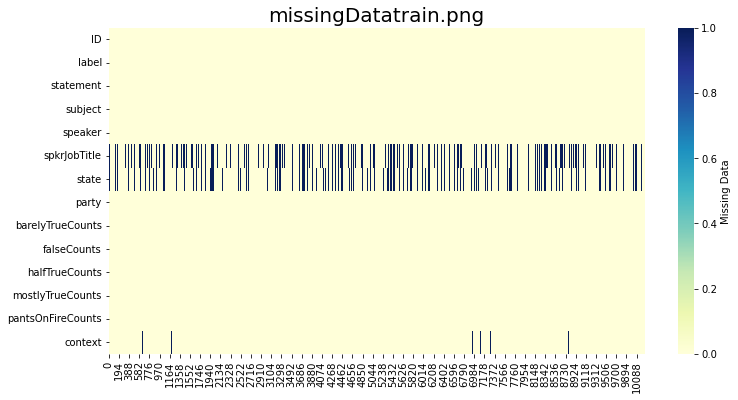

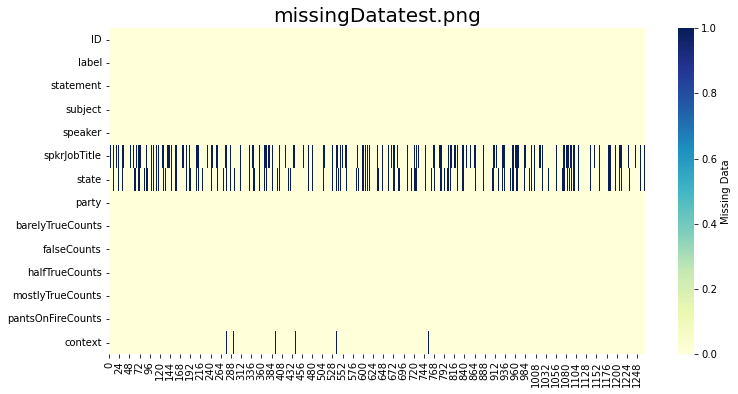

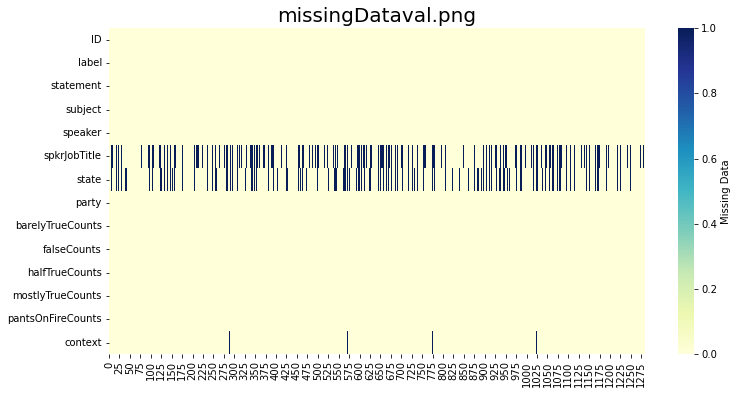

In [142]:
PlotMissingData(train, 'train')
PlotMissingData(test, 'test')
PlotMissingData(val, 'val')

In [143]:
# Count Nulls
trainMissing = train.isnull().sum()
testMissing = test.isnull().sum()
valMissing = val.isnull().sum()

print(trainMissing)
print(testMissing)
print(valMissing)
# Nulls are predominantly job title and state. Arguably I don't think that'll be useful anyway as the other data columns.
# Since this information is qualitative we'd need to actually fetch the correct information but that's too difficult. 
# Instead, not use it to start and see how the predictions go.

ID                      0
label                   0
statement               0
subject                 2
speaker                 2
spkrJobTitle         2897
state                2208
party                   2
barelyTrueCounts        2
falseCounts             2
halfTrueCounts          2
mostlyTrueCounts        2
pantsOnFireCounts       2
context               102
dtype: int64
ID                     0
label                  0
statement              0
subject                0
speaker                0
spkrJobTitle         325
state                262
party                  0
barelyTrueCounts       0
falseCounts            0
halfTrueCounts         0
mostlyTrueCounts       0
pantsOnFireCounts      0
context               17
dtype: int64
ID                     0
label                  0
statement              0
subject                0
speaker                0
spkrJobTitle         345
state                279
party                  0
barelyTrueCounts       0
falseCounts            0
halfTrueCo

## 1.3 Check duplicates

In [144]:
def CheckDuplicateIDs(df):
    duplicateIDs = []
    for count in df.ID.value_counts():
        if count > 1:
            duplicateIDs.append(df.ID)
    if duplicateIDs:
        return duplicateIDs
    else:
        return 0

duplicateTrainIDs = CheckDuplicateIDs(train)
duplicateTestIDs = CheckDuplicateIDs(test)
duplicateValIDs = CheckDuplicateIDs(val)
print(f'Duplicates in Train:{duplicateTrainIDs}, Test:{duplicateTestIDs}, Val:{duplicateValIDs}')


Duplicates in Train:0, Test:0, Val:0


## 1.4 Check Quantitative


(array([2114.,    0., 1962.,    0., 1994.,    0., 1676.,    0., 1654.,
         839.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

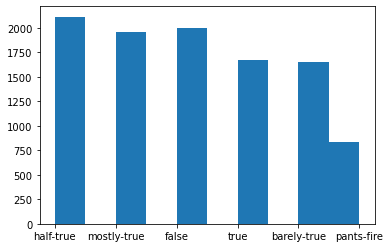

In [145]:
plt.hist(train['label']) 
# Pants-fire has 750 counts vs. the other classes which have approx 1500-2000 counts.
# There's a class imbalance with pants-fire statements. Ideally we get more of such statements to roughly balance out each class.

## 1.5 Check Qualitative

In [146]:
print(f"Unique speakers: {train['speaker'].nunique()} \n")
print(f"Percent unique speakers vs. all train data: {train['speaker'].nunique() / len(train):.2f} \n")
print(train['speaker'].value_counts())
# There's a long tail of single statements from individuals. The highest statement counts are barack and trump, followed by hillary and romney.

Unique speakers: 2909 

Percent unique speakers vs. all train data: 0.28 

barack-obama                                   488
donald-trump                                   273
hillary-clinton                                239
mitt-romney                                    176
scott-walker                                   149
                                              ... 
kai-degner                                       1
lorraine-fende                                   1
nfederation-o-independent-business-virginia      1
jim-moore                                        1
alan-powell                                      1
Name: speaker, Length: 2909, dtype: int64


# 2 Preprocess 

## 2.1 Get Unique List of Subjects, Contexts, Speakers

In [147]:
listOfSubjects = list(train['subject'])

In [148]:
from collections import defaultdict
import itertools
import operator

def CountListOfList(listOfList):
    countDict = defaultdict(int)
    for subjects in train['subject'].items():
        for subject in subjects:
            countDict[subject] += 1
    sortedCount = dict(sorted(countDict.items(), key=operator.itemgetter(1),reverse=True))

    return sortedCount

<BarContainer object of 20 artists>

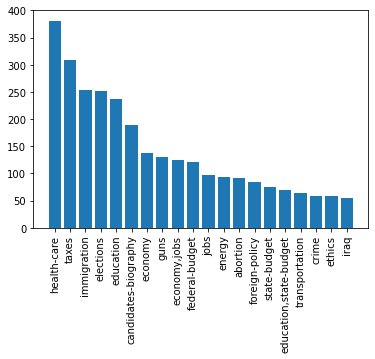

In [149]:
subjects = CountListOfList(listOfSubjects)
top20subjects = dict(itertools.islice(subjects.items(), 20)) # Get top 20 topics
plt.xticks(rotation='vertical')
plt.bar(top20subjects.keys(), top20subjects.values()) 
# Top 3 topics are health care, taxes and immigration and then it decays rapidly.

## 2.2 Process each statement

### 2.2.1 Clean and Stem

In [150]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
def RemovePunctuation(sentence: str, punctuations: str) -> str:
    noPunctuation = ""
    for char in sentence:
        if char not in punctuations:
            noPunctuation = noPunctuation + char
    return noPunctuation

In [152]:
# This implementation outputs a list of tokenised words.
def ProcessStatement(statements: List[str], punctuations: str, cachedStopWords: List, snowballStemmer: SnowballStemmer, stem=True) -> List[str]:

    processedStatements = []
    for statement in statements:
        # Make lower case
        _statement = statement.lower()

        # Remove punctuation
        _statement = RemovePunctuation(_statement, punctuations)
        
        # Remove numbers
        _statement  = re.sub('\w*\d\w*', '', _statement) 

        # Split/Tokenise
        _statement = _statement.split(' ') 

        _wordlist = []
        for word in _statement:
            # Exclude stop word. Exclude one-letter words
            if not word in cachedStopWords and len(word) > 1:
                # Stem the word
                if stem:
                    _wordlist.append(snowballStemmer.stem(word))
                else:
                    _wordlist.append(word)
        processedStatements.append(_wordlist)
    
    return processedStatements

In [153]:
cachedStopWords = stopwords.words("english")
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
snowballStemmer = SnowballStemmer('english')

statements = [list(train['statement']), list(val['statement']), list(test['statement'])]

trainWordsStemmed   = ProcessStatement(statements[0], punctuations, cachedStopWords, snowballStemmer, stem=True)
trainWordsUnstemmed = ProcessStatement(statements[0], punctuations, cachedStopWords, snowballStemmer, stem=False)

valWordsStemmed   = ProcessStatement(statements[1], punctuations, cachedStopWords, snowballStemmer, stem=True)
valWordsUnstemmed = ProcessStatement(statements[1], punctuations, cachedStopWords, snowballStemmer, stem=False)

testWordsStemmed    = ProcessStatement(statements[2], punctuations, cachedStopWords, snowballStemmer, stem=True)
testWordsUnstemmed  = ProcessStatement(statements[2], punctuations, cachedStopWords, snowballStemmer, stem=False)

In [154]:
train['wordsStemmed'] = trainWordsStemmed
train['wordsUnstemmed'] = trainWordsUnstemmed
val['wordsStemmed'] = valWordsStemmed
val['wordsUnstemmed'] = valWordsUnstemmed
test['wordsStemmed'] = testWordsStemmed
test['wordsUnstemmed'] = testWordsUnstemmed
# Added them to their respective dataframes in case of use. 

### 2.2.2 Just clean, no stemming, no tokenisation.

In [155]:
# This implementation outputs a string. Tokenisation is done downstream using libraries.
def cleanStatement(statement):
    statement = statement.lower()
    statement =   RemovePunctuation(statement, '''!()-[]{};:'"\,<>./?@#$%^&*_~''')
    statement = re.sub('\w*\d\w*', '', statement) 
    statement = ' '.join(word for word in statement.split() if word not in set(stopwords.words('english')))
    return statement

In [156]:
train['cleanedStatement'] = train['statement'].apply(cleanStatement)
print(train['cleanedStatement'].head())
print(train['statement'].head())

0    decline coal start started natural gas took st...
1    hillary clinton agrees john mccain voting give...
2    health care reform legislation likely mandate ...
3                 economic turnaround started end term
4    chicago bears starting quarterbacks last years...
Name: cleanedStatement, dtype: object
0    When did the decline of coal start? It started...
1    Hillary Clinton agrees with John McCain "by vo...
2    Health care reform legislation is likely to ma...
3    The economic turnaround started at the end of ...
4    The Chicago Bears have had more starting quart...
Name: statement, dtype: object


In [157]:
test['cleanedStatement'] = test['statement'].apply(cleanStatement)
print(test['cleanedStatement'].head())
print(test['statement'].head())

0            wisconsin pace double number layoffs year
1              says john mccain done nothing help vets
2    suzanne bonamici supports plan cut choice medi...
3    asked reporter whether hes center criminal sch...
4    past five years federal government paid millio...
Name: cleanedStatement, dtype: object
0    Wisconsin is on pace to double the number of l...
1    Says John McCain has done nothing to help the ...
2    Suzanne Bonamici supports a plan that will cut...
3    When asked by a reporter whether hes at the ce...
4    Over the past five years the federal governmen...
Name: statement, dtype: object


In [158]:
val['cleanedStatement'] = val['statement'].apply(cleanStatement)
print(val['cleanedStatement'].head())
print(val['statement'].head())

0    obama sworn office use holy bible instead kura...
1    says organizations parading social welfare org...
2               says nearly half oregons children poor
3    attacks republicans various programs economic ...
4    says armed civilians stop mass shootings guns ...
Name: cleanedStatement, dtype: object
0    When Obama was sworn into office, he DID NOT u...
1    Says Having organizations parading as being so...
2       Says nearly half of Oregons children are poor.
3    On attacks by Republicans that various program...
4    Says when armed civilians stop mass shootings ...
Name: statement, dtype: object


## 2.3 One hot encode some of the MetaData

In [159]:
speakerOhe = pd.get_dummies(train['speaker']) 
partyOhe = pd.get_dummies(train['party'])
# In case of usage.

# 3 Feature Engineering

## 3.1 Embed using Word2Vec

In [160]:
from gensim.models import Word2Vec, KeyedVectors
pretrainedpath = "GoogleNews-vectors-negative300.bin"
w2vModel = KeyedVectors.load_word2vec_format(pretrainedpath,binary=True)
print('done loading Word2Vec')

done loading Word2Vec


In [161]:
def EmbedWords(processedStatements: List[List]) -> List:
    """Averages word embeddings in a sentence to return a word vector"""
    DIMENSION = 300
    zeroVector = np.zeros(DIMENSION)
    wordVectors = []
    excludedWordCount = 0
    excludedWords = []
    totalCount = 0

    for tokens in processedStatements:
        currentVector = zeroVector
        tokenCount = 0
        for token in tokens:
            totalCount += 1
            if token in w2vModel:
                currentVector += w2vModel[token]
                tokenCount += 1
            else:
                excludedWordCount += 1
                excludedWords.append(token)
        wordVectors.append(currentVector/tokenCount)
    return wordVectors, (excludedWords, excludedWordCount/totalCount)

In [162]:
# Need to use unstemmed words to match the words in word2vec "GoogleNews-vectors-negative300.bin" model
trainVec, trainVecLog = EmbedWords(train['wordsUnstemmed']) # 3% of token words excluded. Acceptable.
valVec, valVecLog = EmbedWords(val['wordsUnstemmed']) # 3% of token words excluded. Acceptable.
testVec, testVecLog = EmbedWords(test['wordsUnstemmed']) # 3% of token words excluded. Acceptable.

# 4 Train Multiclass Classifiers

In [163]:
# Randomise rows of data
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)
val = val.sample(frac=1).reset_index(drop=True)

## 4.1 Baseline Models (Bag of Words)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn import metrics

In [165]:
def trainBaselineModels(xTrain, yTrain, xVal, yVal, xTest, yTest):
    # Initialise models
    models = [naive_bayes.MultinomialNB(), KNeighborsClassifier(), LogisticRegression(C=1.0, max_iter=10000)]
    modelName = ['NB MultiNomninal', 'KNN', 'Logistic']

    accuracies = []
    for model in models:

        # Fit model on training data and labels
        model.fit(xTrain, yTrain)

        # Predict on test data
        predictions = model.predict(xVal)

        # Check accuracy
        accuracy = metrics.accuracy_score(yVal, predictions)
        accuracies.append(accuracy)

    # Print Accuracy
    for i in range(3):
        print(f'{modelName[i]} Validation accuracy: {accuracies[i]:.2f}')
    print('Choose Logistics because highest validation accuracy')

    # Predict on Test Data
    yPred = model.predict(xTest)
    testAccuracy = metrics.accuracy_score(yTest, yPred)
    print(f'\nPredict on Test Data...accuracy: {testAccuracy:.2f}')
    
    # Evaluate Precision, Recall, F1-Score for Logistic
    print('\n Classification Report for Predictions on Test Data with Logistic Model')
    print(metrics.classification_report(yTest, yPred))

    # Evaluate Confusion Matrix for Logistic
    print('\n Confusion Matrix for Predictions on Test Data with Logistic Model')
    cmDisp = metrics.ConfusionMatrixDisplay.from_predictions(yTest, yPred, xticks_rotation='vertical')


### 4.1.1 CountVectorizer

NB MultiNomninal Validation accuracy: 0.25
KNN Validation accuracy: 0.24
Logistic Validation accuracy: 0.25
Choose Logistics because highest validation accuracy

Predict on Test Data...accuracy: 0.24

 Classification Report for Predictions on Test Data with Logistic Model
              precision    recall  f1-score   support

 barely-true       0.23      0.21      0.22       212
       false       0.27      0.30      0.28       249
   half-true       0.24      0.22      0.23       265
 mostly-true       0.23      0.24      0.24       241
  pants-fire       0.23      0.17      0.20        92
        true       0.24      0.26      0.25       207

    accuracy                           0.24      1266
   macro avg       0.24      0.23      0.24      1266
weighted avg       0.24      0.24      0.24      1266


 Confusion Matrix for Predictions on Test Data with Logistic Model


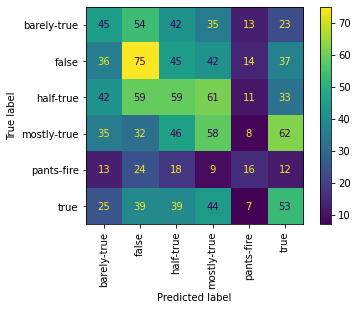

In [166]:
# Initialise count vectorizer to model 'Bag of Words' with tokenization (keeps punctuation)
countVec = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)

# Fit vectorizer to the corpus
countVec.fit(train['statement'])

# Transform training and val statements
xTrain = countVec.transform(train['statement'])
xVal = countVec.transform(val['statement'])
xTest = countVec.transform(test['statement'])

trainBaselineModels(xTrain, train['label'], xVal, val['label'], xTest, test['label'])
# The model tends to predict false correctly more than the other labels.

### 4.1.2 TfidVectorizer (replaces counts with floats)

NB MultiNomninal Validation accuracy: 0.24
KNN Validation accuracy: 0.22
Logistic Validation accuracy: 0.25
Choose Logistics because highest validation accuracy

Predict on Test Data...accuracy: 0.25

 Classification Report for Predictions on Test Data with Logistic Model
              precision    recall  f1-score   support

 barely-true       0.25      0.18      0.21       212
       false       0.28      0.35      0.31       249
   half-true       0.22      0.29      0.25       265
 mostly-true       0.24      0.25      0.25       241
  pants-fire       0.36      0.04      0.08        92
        true       0.27      0.25      0.26       207

    accuracy                           0.25      1266
   macro avg       0.27      0.23      0.23      1266
weighted avg       0.26      0.25      0.24      1266


 Confusion Matrix for Predictions on Test Data with Logistic Model


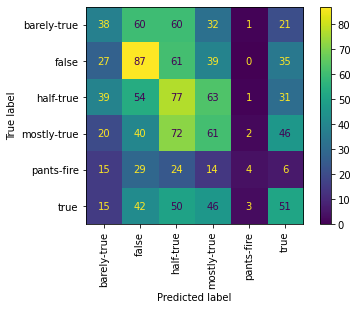

In [167]:
# Initialise count vectorizer to model 'Bag of Words' with tokenization (keeps punctuation)
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)

# Fit vectorizer to the corpus
tfv.fit(train['statement'])

# Transform training and val statements
xTrain = tfv.transform(train['statement'])
xVal= tfv.transform(val['statement'])
xTest = tfv.transform(test['statement'])

trainBaselineModels(xTrain, train['label'], xVal, val['label'], xTest, test['label'])
# This model tends to predict false correctly more than the other labels.

### 4.1.3 Ngram range 1 to 3

NB MultiNomninal Validation accuracy: 0.24
KNN Validation accuracy: 0.25
Logistic Validation accuracy: 0.26
Choose Logistics because highest validation accuracy

Predict on Test Data...accuracy: 0.25

 Classification Report for Predictions on Test Data with Logistic Model
              precision    recall  f1-score   support

 barely-true       0.27      0.14      0.19       212
       false       0.28      0.35      0.31       249
   half-true       0.23      0.37      0.29       265
 mostly-true       0.23      0.28      0.25       241
  pants-fire       0.00      0.00      0.00        92
        true       0.26      0.17      0.21       207

    accuracy                           0.25      1266
   macro avg       0.21      0.22      0.21      1266
weighted avg       0.24      0.25      0.23      1266


 Confusion Matrix for Predictions on Test Data with Logistic Model


C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

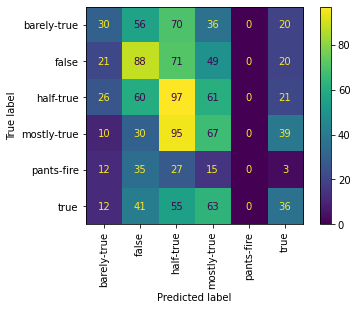

In [168]:
# Initialise count vectorizer to model 'Bag of Words' with tokenization (keeps punctuation). Specifically try ngrams ranges 1 to 3
tfv = TfidfVectorizer(tokenizer=word_tokenize,token_pattern=None,ngram_range=(1, 3))

# Fit vectorizer to the corpus
tfv.fit(train['statement'])

# Transform training and val statements
xTrain = tfv.transform(train['statement'])
xVal = tfv.transform(val['statement'])
xTest = tfv.transform(test['statement'])

trainBaselineModels(xTrain, train['label'], xVal, val['label'], xTest, test['label'])
# This model tends to predict half-truths and mostly-trues more than the other labels. Curiously, no pants-fire predictions. 

## 4.2 Use Baseline Models but with Word2Vec Instead

Models: Logistic, KNN
Accuracy = 0.20
Accuracy = 0.18
Choose Logistics because highest validation accuracy

Predict on Test Data...accuracy: 0.18

 Classification Report for Predictions on Test Data with Logistic Model
              precision    recall  f1-score   support

 barely-true       0.16      0.32      0.22       212
       false       0.20      0.18      0.19       249
   half-true       0.25      0.18      0.21       265
 mostly-true       0.21      0.14      0.17       241
  pants-fire       0.10      0.07      0.08        92
        true       0.14      0.14      0.14       207

    accuracy                           0.18      1266
   macro avg       0.18      0.17      0.17      1266
weighted avg       0.19      0.18      0.18      1266


 Confusion Matrix for Predictions on Test Data with Logistic Model


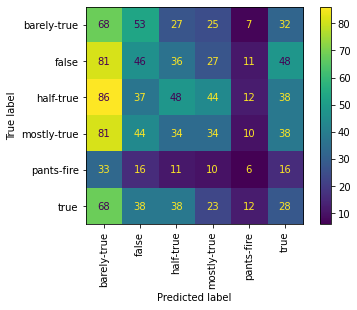

In [169]:
# Use the Word2Vec embedding created earlier. Note: NaiveBayes doesn't work with negative numbers
models = [LogisticRegression(C=1.0, max_iter=10000), KNeighborsClassifier()]
print(f'Models: Logistic, KNN')

for model in models:

    # Fit model on training data and labels
    model.fit(trainVec, train['label'])

    # Evaluate on val data
    predictions = model.predict(valVec)

    # Check accuracy
    accuracy = metrics.accuracy_score(val['label'], predictions)
    print(f"Accuracy = {accuracy:.2f}")

print('Choose Logistics because highest validation accuracy')

# Predict on Test Data
yPred = model.predict(testVec)
testAccuracy = metrics.accuracy_score(test['label'], yPred)
print(f'\nPredict on Test Data...accuracy: {testAccuracy:.2f}')

# Evaluate Precision, Recall, F1-Score for Logistic
print('\n Classification Report for Predictions on Test Data with Logistic Model')
print(metrics.classification_report(test['label'], yPred))

# Evaluate Confusion Matrix for Logistic
print('\n Confusion Matrix for Predictions on Test Data with Logistic Model')
cmDisp = metrics.ConfusionMatrixDisplay.from_predictions(test['label'], yPred, xticks_rotation='vertical')
# This model tends to label barely-true to its predictions

# 4.3 Deep learning: LSTM Model
For word embeddings use one of the following options: embedding layer in Keras, Word2Vec, GloVE. You have the freedom to pick your own deep learning architecture.
- Most common architectures are CNNs and RNNs. LSTMs are a popular form of RNN.
- LSTMs are popular because they handle sequential data whereas CNNs don't.
- Recent approachs also involve starting with large, pre-trained language model and fine-tuning them for the task at hand.

In [170]:
import keras
import tensorflow
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical # This is now fully integrated into tensorflow
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Embedding, LSTM
from keras.models import Sequential
from keras import layers

### 4.3.1 Word Embedding for LSTM
1. tokenise the texts and convert into word index vectors
1. Pad the text sequence so that all texts are the same length
1. Map every word index to an embedding vector by multiplying word index vectors with the embedding matrix (pre-trained embeddings or custom embedding)

In [171]:
# Set train, test, val input data [Processed Statements: no punctuation, no stop words]
_xTrain = train['cleanedStatement']
_xTest = test['cleanedStatement']
_xVal = val['cleanedStatement']

_yTrain = train['label']
_yTest = test['label']
_yVal = val['label']

# Sanity Check input data
print(_xTrain.head(), _yTrain.head())
print(_xTest.head(), _yTest.head())
print(_xVal.head(), _yVal.head())

0    syria alot allies signed last minute obama backed
1    wisconsin people kind addictive gambling probl...
2    air travelers cant get plane united states wit...
3                         deporting illegal immigrants
4    saysbarack obama voted language ofindianas rel...
Name: cleanedStatement, dtype: object 0    barely-true
1          false
2      half-true
3           true
4      half-true
Name: label, dtype: object
0    california windmills killing hundreds hundreds...
1    percent gun sellers responsible half guns used...
2    senate passed budget three years good budget b...
3    barack obama percent votes solely along party ...
4    sarah palin already executive experience barac...
Name: cleanedStatement, dtype: object 0    barely-true
1      half-true
2           true
3           true
4           true
Name: label, dtype: object
0    says donald trump thinks climate change hoax i...
1    back great recession millions jobs across amer...
2    definitely lost way jobs texas year

In [172]:
# Define constants for the LSTM
MAX_SEQUENCE_LENGTH = 200
MAX_NUM_WORDS = 100
EMBEDDING_DIM = 50

In [173]:
# Convert labels from categoricals to one hot encoded columns
le = LabelEncoder()
le.fit(train['label'])
labelMap = dict(zip(le.classes_, le.transform(le.classes_))) 
print(f'Label Map: {labelMap}')

# Convert String labels to Integers
yTrainIntClass = le.transform(_yTrain)
yTestIntClass = le.transform(_yTest)
yValIntClass = le.transform(_yVal)
labelMapIntAsKey = {value:key for key, value in labelMap.items()} # Make integer keys and strings the values. Used in metrics

# Convert to OHE
NUM_CLASSES = len(labelMap)
yTrain = to_categorical(yTrainIntClass, NUM_CLASSES)
yTest = to_categorical(yTestIntClass, NUM_CLASSES)
yVal = to_categorical(yValIntClass, NUM_CLASSES)

print(yTrain, yTest, yVal)

Label Map: {'barely-true': 0, 'false': 1, 'half-true': 2, 'mostly-true': 3, 'pants-fire': 4, 'true': 5}
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]] [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]] [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [174]:
# Use Stanford Glove to create
embeddingDict = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        embeddingDict[word] = np.asarray(values[1:], dtype='float32')

word_index = {w: i for i, w in enumerate(embeddingDict.keys(), 1)}

#create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddingDict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector[:EMBEDDING_DIM]

In [175]:
from keras.preprocessing.text import text_to_word_sequence

def texts_to_sequences(texts, word_index):
    for text in texts:
        tokens = text_to_word_sequence(text)
        yield [word_index.get(w) for w in tokens if w in word_index]

In [176]:
trainSequence = texts_to_sequences(list(_xTrain), word_index)
trainData = pad_sequences(list(trainSequence), maxlen=MAX_SEQUENCE_LENGTH)

testSequence = texts_to_sequences(list(_xTest), word_index)
testData = pad_sequences(list(testSequence), maxlen=MAX_SEQUENCE_LENGTH)

valSequence = texts_to_sequences(list(_xVal), word_index)
valData = pad_sequences(list(valSequence), maxlen=MAX_SEQUENCE_LENGTH)

In [177]:
# Sanity check
print(valData)
print(testData)
print(trainData)

[[    0     0     0 ... 17750  7768   328]
 [    0     0     0 ...  8644   887   243]
 [    0     0     0 ...   746  1486    63]
 ...
 [    0     0     0 ... 41687  2927  1314]
 [    0     0     0 ...  1018   694  1668]
 [    0     0     0 ...   272  7143  3985]]
[[    0     0     0 ...  1151  1151  5843]
 [    0     0     0 ...  2886   181  1660]
 [    0     0     0 ...   979   833   833]
 ...
 [    0     0     0 ...  7228    96    83]
 [    0     0     0 ...  5504  2719 10731]
 [    0     0     0 ...   937   276 25952]]
[[    0     0     0 ...  1215   766  1838]
 [    0     0     0 ... 44910   748 28819]
 [    0     0     0 ...  1319  2094  2376]
 ...
 [    0     0     0 ...  4225  1155   253]
 [    0     0     0 ...  2253  6382  1720]
 [    0     0     0 ...  3638 12710   602]]


In [178]:
# Create Embedding Layer
embeddingLayer = Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), input_length=MAX_SEQUENCE_LENGTH, trainable=False)

## 4.3.2 Create Deep Learning Model
You have the freedom to pick your own deep learning architecture.

In [179]:
# Set up plots
def PlotHistory(model):
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

In [180]:
from sklearn import metrics
def EvalDeepLearningModel(myLSTM, xTest, yTest, labelMap):
    # Predict on training data
    yPred = myLSTM.predict(xTest)

    # Preproces back to class labels
    yPredRounded =np.argmax(yPred, axis=1) # Convert from OHE back to single column of integers
    yTestRounded = np.argmax(yTest, axis=1) # Convert from OHE back to single column of  integers
    yPredString = [labelMapIntAsKey[integerLabel] for integerLabel in yPredRounded] # Convert labels from intergers to strings
    yTestString = [labelMapIntAsKey[integerLabel] for integerLabel in yTestRounded] # Convert labels from intergers to strings

    # Evaluate Confusion Matrix
    cm = metrics.confusion_matrix(yTestString, yPredString)
    cmDisp = metrics.ConfusionMatrixDisplay(cm, display_labels=[values for key, values in labelMap.items()])
    cmDisp.plot()

    # Evaluate Precision, Recall, F1-Score
    print(metrics.classification_report(yTestString, yPredString))

    # ROC is for binary classification. So we need to use One vs. One and One vs. Rest for multiclass classification.
    # Note: ROC for multi-class can be macro or weighted since we need to effectively collapse the ROCs for each label into one metric.
    # Good 0.8-0.9. Acceptable 0.7-0.8. Bad < 0.5.
    macroAUC_OVO = metrics.roc_auc_score(yTest, yPred, multi_class="ovo", average="macro")
    weightedAUC_OVO = metrics.roc_auc_score(yTest, yPred, multi_class="ovo", average="weighted")
    print(f'Macro AUC OVO : {macroAUC_OVO:.3f}, Weighted AUC OVO: {weightedAUC_OVO:.3f}')

    macroAUC_OVR = metrics.roc_auc_score(yTest, yPred, multi_class="ovr", average="macro")
    weightedAUC_OVR = metrics.roc_auc_score(yTest, yPred, multi_class="ovr", average="weighted")
    print(f'Macro AUC OVR : {macroAUC_OVR:.3f}, Weighted AUC OVR: {weightedAUC_OVR:.3f}')

## 4.3.3. Basic Architecture

In [181]:
# Create Deep Learning Network BASIC
myLSTM0 = Sequential()
myLSTM0.add(Embedding(MAX_NUM_WORDS, 128))
myLSTM0.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
myLSTM0.add(Dense(6, activation='softmax')) # Use softmax for multi-class classification
myLSTM0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # use categorical_crossentropy for multi-class classification

# Train The Model
print('\nTraining the model...')
resultBasic = myLSTM0.fit(trainData, yTrain, batch_size=32, epochs=1, validation_data=(valData, yVal))

# Check Accuracy on Test
score, acc = myLSTM0.evaluate(testData, yTest, batch_size=32)
print('\nTesting Model...')
print(f'LSTM predication accuracy on Test Data: {acc:.2f}')


Training the model...
40/40 [==============================] - 5s 114ms/step - loss: 1.7454 - accuracy: 0.2220

Testing Model...
LSTM predication accuracy on Test Data: 0.22


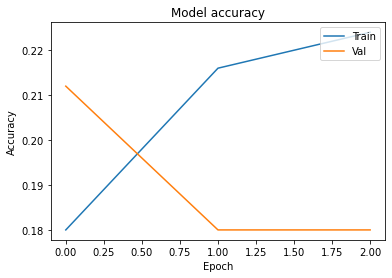

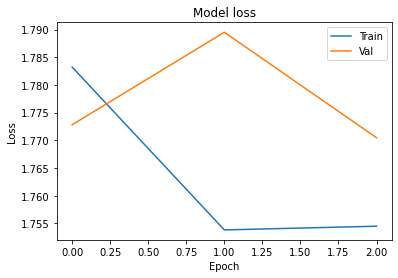

In [182]:
PlotHistory(resultBasic)

C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

 barely-true       0.00      0.00      0.00       212
       false       0.22      0.51      0.31       249
   half-true       0.24      0.34      0.28       265
 mostly-true       0.20      0.26      0.23       241
  pants-fire       0.00      0.00      0.00        92
        true       0.00      0.00      0.00       207

    accuracy                           0.22      1266
   macro avg       0.11      0.19      0.14      1266
weighted avg       0.13      0.22      0.16      1266

Macro AUC OVO : 0.535, Weighted AUC OVO: 0.537
Macro AUC OVR : 0.535, Weighted AUC OVR: 0.537


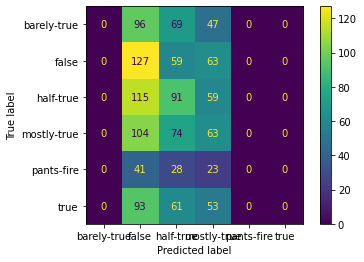

In [183]:
EvalDeepLearningModel(myLSTM0, testData, yTest, labelMapIntAsKey)
# This model tends to label false more often than others. Curiously, it can't predict barely true, pants fire, or true.

# 4.3.3.1 Investigate suspicious result

In [184]:
# Check why the LSTM model is unable to distinguish classify correctly.
yPred = myLSTM0.predict(testData)
print(yPred)  # The sum of probabilities = 1 for multiclass classification. The model is just a poor predictor.

[[0.14279059 0.23043352 0.18124877 0.19832218 0.07849337 0.16871151]
 [0.14527677 0.20457572 0.20663995 0.21558253 0.06364278 0.16428226]
 [0.14831686 0.19746386 0.21291292 0.21653162 0.06165187 0.16312288]
 ...
 [0.13005126 0.25571406 0.16760056 0.19030498 0.07576412 0.18056509]
 [0.14279059 0.23043352 0.18124877 0.19832218 0.07849337 0.16871151]
 [0.14569566 0.22211626 0.18747513 0.20110446 0.07635821 0.16725025]]


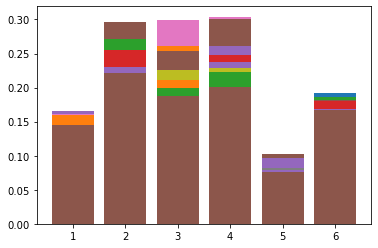

In [185]:
# Plot overlay of each prediction's probability vs. class label to get a sense of variability in predictions
for i in range(0, len(yPred)):
    plt.bar([1,2,3,4,5,6], yPred[i])
# We can see that the model underweights 'pants-fire', 'true', and 'barely-true' (by virtue of column idx vs. previous confusion matrix plot).
# This explains why these columns have zero counts, they never are the highest value vs. the other predicted labels.

In [186]:
# Create Deep Learning Network
myLSTM1 = Sequential()
myLSTM1.add(Embedding(MAX_NUM_WORDS, 128))
myLSTM1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
myLSTM1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
myLSTM1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
myLSTM1.add(Dense(20, activation='softmax'))
myLSTM1.add(Dense(6, activation='softmax'))
myLSTM1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train The Model
print('\nTraining the model...')
result = myLSTM1.fit(trainData, yTrain, batch_size=32, epochs=3, validation_data=(valData, yVal))

# Check Accuracy on Test
score, acc = myLSTM1.evaluate(testData, yTest, batch_size=32)
print('\nTesting Model...')
print(f'LSTM predication accuracy on Test Data: {acc:.2f}')


Training the model...
Epoch 1/3
320/320 [==============================] - 1379s 4s/step - loss: 1.7625 - accuracy: 0.1993 - val_loss: 1.7661 - val_accuracy: 0.2050
Epoch 2/3
320/320 [==============================] - 1393s 4s/step - loss: 1.7583 - accuracy: 0.1984 - val_loss: 1.7637 - val_accuracy: 0.1933
Epoch 3/3
40/40 [==============================] - 15s 380ms/step - loss: 1.7508 - accuracy: 0.2093

Testing Model...
LSTM predication accuracy on Test Data: 0.21


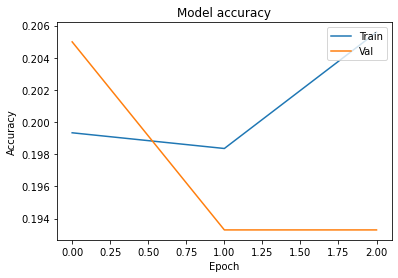

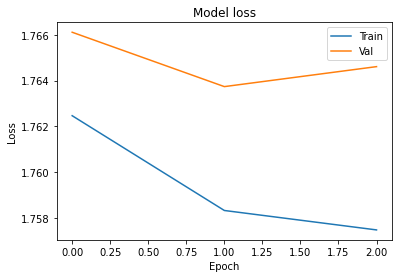

In [187]:
PlotHistory(result)

# 5 Hyperparameter tuning
In machine learning, hyperparameter tuning is the problem of choosing a set of optimal
hyperparameters for a learning algorithm. In this step, select one or two parameters and
optimise them to further improve the performance of your LSTM model.

## 5.1 Change number of epochs from 3 to 5

In [188]:
# Create Deep Learning Network
myLSTM2 = Sequential()
myLSTM2.add(Embedding(MAX_NUM_WORDS, 128))
myLSTM2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
myLSTM2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
myLSTM2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
myLSTM2.add(Dense(20, activation='softmax'))
myLSTM2.add(Dense(6, activation='softmax'))
myLSTM2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train The Model
print('\nTraining the model...')
resultEpochChange = myLSTM2.fit(trainData, yTrain, batch_size=32, epochs=5, validation_data=(valData, yVal))

# Check Accuracy on Test
score, acc = myLSTM2.evaluate(testData, yTest, batch_size=32)
print('\nTesting Model...')
print(f'LSTM predication accuracy on Test Data: {acc:.2f}')


Training the model...
Epoch 1/5
320/320 [==============================] - 1399s 4s/step - loss: 1.7611 - accuracy: 0.2055 - val_loss: 1.7674 - val_accuracy: 0.1933
Epoch 2/5
320/320 [==============================] - 1294s 4s/step - loss: 1.7580 - accuracy: 0.2044 - val_loss: 1.7631 - val_accuracy: 0.1933
Epoch 3/5
320/320 [==============================] - 1425s 4s/step - loss: 1.7575 - accuracy: 0.2045 - val_loss: 1.7640 - val_accuracy: 0.1933
Epoch 4/5
320/320 [==============================] - 1495s 5s/step - loss: 1.7573 - accuracy: 0.2050 - val_loss: 1.7636 - val_accuracy: 0.1933
Epoch 5/5
40/40 [==============================] - 17s 435ms/step - loss: 1.7497 - accuracy: 0.2093

Testing Model...
LSTM predication accuracy on Test Data: 0.21


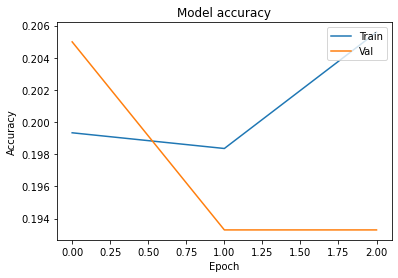

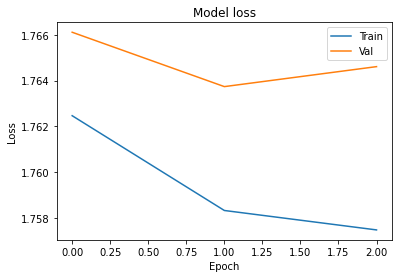

In [189]:
PlotHistory(resultEpochChange)

## 5.2 Change batch size from 32 to 100

In [ ]:
# Create Deep Learning Network
myLSTM3 = Sequential()
myLSTM3.add(Embedding(MAX_NUM_WORDS, 128))
myLSTM3.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
myLSTM3.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
myLSTM3.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
myLSTM3.add(Dense(20, activation='softmax'))
myLSTM3.add(Dense(6, activation='softmax'))
myLSTM3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train The Model
print('\nTraining the model...')
resultBatchChange = myLSTM3.fit(trainData, yTrain, batch_size=100, epochs=3, validation_data=(valData, yVal))

# Check Accuracy on Test
score, acc = myLSTM3.evaluate(testData, yTest, batch_size=32)
print('\nTesting Model...')
print(f'LSTM predication accuracy on Test Data: {acc:.2f}')

In [ ]:
PlotHistory(resultBatchChange)

# 6 Model Evaluation

## 6.1 Use metrics such as precision, recall, F-measure and AUC to evaluate the performance of your models.

C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

 barely-true       0.00      0.00      0.00       212
       false       0.22      0.51      0.31       249
   half-true       0.24      0.34      0.28       265
 mostly-true       0.20      0.26      0.23       241
  pants-fire       0.00      0.00      0.00        92
        true       0.00      0.00      0.00       207

    accuracy                           0.22      1266
   macro avg       0.11      0.19      0.14      1266
weighted avg       0.13      0.22      0.16      1266

Macro AUC OVO : 0.535, Weighted AUC OVO: 0.537
Macro AUC OVR : 0.535, Weighted AUC OVR: 0.537


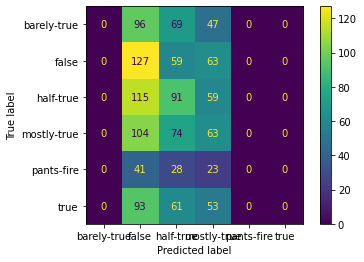

In [191]:
EvalDeepLearningModel(myLSTM0, testData, yTest, labelMapIntAsKey)
# Bad predictor

C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

 barely-true       0.00      0.00      0.00       212
       false       0.00      0.00      0.00       249
   half-true       0.21      1.00      0.35       265
 mostly-true       0.00      0.00      0.00       241
  pants-fire       0.00      0.00      0.00        92
        true       0.00      0.00      0.00       207

    accuracy                           0.21      1266
   macro avg       0.03      0.17      0.06      1266
weighted avg       0.04      0.21      0.07      1266

Macro AUC OVO : 0.515, Weighted AUC OVO: 0.516
Macro AUC OVR : 0.515, Weighted AUC OVR: 0.516


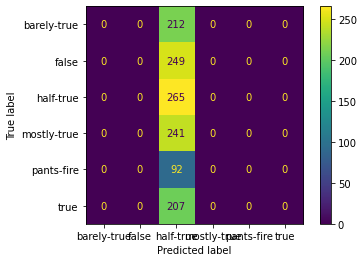

In [192]:
EvalDeepLearningModel(myLSTM1, testData, yTest, labelMapIntAsKey)
# Absolutely terrible predictor

C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jason\anaconda3\envs\uni_adelaide_keras\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

 barely-true       0.00      0.00      0.00       212
       false       0.00      0.00      0.00       249
   half-true       0.21      1.00      0.35       265
 mostly-true       0.00      0.00      0.00       241
  pants-fire       0.00      0.00      0.00        92
        true       0.00      0.00      0.00       207

    accuracy                           0.21      1266
   macro avg       0.03      0.17      0.06      1266
weighted avg       0.04      0.21      0.07      1266

Macro AUC OVO : 0.522, Weighted AUC OVO: 0.526
Macro AUC OVR : 0.522, Weighted AUC OVR: 0.526


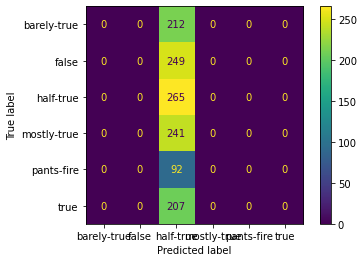

In [193]:
EvalDeepLearningModel(myLSTM2, testData, yTest, labelMapIntAsKey)
# Absolutely terrible predictor

In [ ]:
EvalDeepLearningModel(myLSTM3, testData, yTest, labelMapIntAsKey)
# Absolutely terrible predictor as well

# 7 Conclusion

All evaluated models performed poorly.

The least worst model is the Logistic Regression with TfidVectorizer whose corpus is the statements in Training data set.
- Accuracy 0.25 on validation data, which on par or better than all other candidates.
- Precision and recall weighted and macro were marginally higher than all other candidates.
I would not use this model in production settings because it is terrible at prediction.

Compared to the benchmark 'Liar Liar Pants on Fire' paper by Wang (2017), he achieved: an accuracy score on test data of 0.27 with CNN model and text-only input, and 0.27 accurracy with hybrid+CNNs when including text and meta-data. 

Future work
- Adding metadata via a concatenated deep learning model could potentially replicate Wang's 2017 results.
- However, to significantly improve beyond Wang's achievements, the latest in NLP machine learning is to use transformers, which have 'replaced LSTMs'. Pre-trained transformers like GPT would likely lead to better results. Work would need to be done to understand how to leverage these pre-trained models for this specific problem definition of predicting multi-class labels on the truthfulness of statements.
- But the crux of the problem is less to do with mechanics of machine learning but rather the social/political/technological boundary problem of disinformation and the lack of an objectivite metric for truth. This is known as a 'wicked problem', where 'no agreement exists about what the problem is, and each attempt to creat a solution changes the problem' [1].

References
1. Batie, S. (2008) Wicked Problems and Applied Economics, Amer. J. Agr. Econ. 90. http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=E9511AFDE10C09EC1EF3B3A6CF1F6BA5?doi=10.1.1.711.9422&rep=rep1&type=pdf#:~:text=Examples%20of%20wicked%20problem%20issue,Fellows%20Address
